# 🥗💪**Final Project: Macronutrient-Based Meal Classification**💪🥗

## **A. Dataset Loading**

### **Import Libraries**

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

### **Load Dataset**

In [50]:
nutri = pd.read_csv(r"C:\Users\Earl Yuan Balabag\OneDrive\Documents\COLLEGE\4TH YEAR\ELECTIVE 2\Midterm\daily_food_nutrition_dataset.csv")

In [51]:
nutri.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [52]:
nutri.describe()

,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [53]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [54]:
nutri.isnull().sum()

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

## **B. Preprocessing**

### **1. Handling Missing Values**

In [55]:
numeric_cols = [
    'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)',
    'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)',
    'Water_Intake (ml)'
]

categorical_cols = ['Food_Item', 'Category', 'Meal_Type']

for col in numeric_cols:
    nutri[col].fillna(nutri[col].mean(), inplace=True)

for col in categorical_cols:
    nutri[col].fillna(nutri[col].mode()[0], inplace=True)

C:\Users\Earl Yuan Balabag\AppData\Local\Temp\ipykernel_24148\1230765725.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nutri[col].fillna(nutri[col].mean(), inplace=True)
C:\Users\Earl Yuan Balabag\AppData\Local\Temp\ipykernel_24148\1230765725.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### **2. Feature Engineering**

In [56]:
nutri["Total_kcal_macros"] = (
    nutri["Protein (g)"] * 4 +
    nutri["Carbohydrates (g)"] * 4 +
    nutri["Fat (g)"] * 9
)

nutri["Total_kcal_macros"].replace(0, 1, inplace=True)

nutri["Protein_pct"] = (nutri["Protein (g)"] * 4) / nutri["Total_kcal_macros"]
nutri["Carbs_pct"]   = (nutri["Carbohydrates (g)"] * 4) / nutri["Total_kcal_macros"]
nutri["Fat_pct"]     = (nutri["Fat (g)"] * 9)         / nutri["Total_kcal_macros"]

C:\Users\Earl Yuan Balabag\AppData\Local\Temp\ipykernel_24148\3935304999.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nutri["Total_kcal_macros"].replace(0, 1, inplace=True)


In [57]:
def classify_meal(row):
    p, c, f, kcal = row["Protein_pct"], row["Carbs_pct"], row["Fat_pct"], row["Calories (kcal)"]

    # Breakfast
    if 0.10 <= p <= 0.30 and 0.35 <= c <= 0.65 and 0.15 <= f <= 0.35 and 150 <= kcal <= 550:
        return "Breakfast"

    # Lunch
    elif 0.15 <= p <= 0.35 and 0.30 <= c <= 0.55 and 0.20 <= f <= 0.40 and 350 <= kcal <= 900:
        return "Lunch"

    # Dinner
    elif 0.15 <= p <= 0.40 and 0.20 <= c <= 0.50 and 0.20 <= f <= 0.45 and 300 <= kcal <= 900:
        return "Dinner"

    # Snack
    elif 0.00 <= p <= 0.25 and 0.20 <= c <= 0.70 and 0.05 <= f <= 0.45 and 50 <= kcal <= 350:
        return "Snack"

    # Everything else
    return "Unknown"

nutri["Rule_Meal_Type"] = nutri.apply(classify_meal, axis=1)

### **3. Data Filtering**

In [72]:
nutri_filtered = nutri[nutri["Rule_Meal_Type"] != "Unknown"]

In [73]:
nutri_filtered.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml),Total_kcal_macros,Protein_pct,Carbs_pct,Fat_pct,Rule_Meal_Type
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635,657.0,0.164992,0.481583,0.353425,Snack
16,2024-07-13,651,Oats,Grains,297,36.3,76.4,24.9,2.9,37.6,269,66,Lunch,338,674.9,0.215143,0.452808,0.332049,Breakfast
21,2024-01-11,135,Oats,Grains,492,32.8,45.9,27.5,7.5,5.1,435,70,Breakfast,255,562.3,0.233327,0.326516,0.440157,Dinner
26,2024-08-20,6,Strawberry,Fruits,141,19.0,93.3,11.8,5.7,20.0,970,263,Lunch,967,555.4,0.136838,0.671948,0.191214,Snack
27,2024-10-08,386,Oats,Grains,336,43.1,56.8,21.9,9.4,18.1,452,262,Lunch,791,596.7,0.288922,0.380761,0.330317,Breakfast


In [75]:
nutri_model = df_filtered.drop(columns=["Meal_Type","Water_Intake (ml)"])

In [76]:
nutri_model.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Total_kcal_macros,Protein_pct,Carbs_pct,Fat_pct,Rule_Meal_Type
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,657.0,0.164992,0.481583,0.353425,Snack
16,2024-07-13,651,Oats,Grains,297,36.3,76.4,24.9,2.9,37.6,269,66,674.9,0.215143,0.452808,0.332049,Breakfast
21,2024-01-11,135,Oats,Grains,492,32.8,45.9,27.5,7.5,5.1,435,70,562.3,0.233327,0.326516,0.440157,Dinner
26,2024-08-20,6,Strawberry,Fruits,141,19.0,93.3,11.8,5.7,20.0,970,263,555.4,0.136838,0.671948,0.191214,Snack
27,2024-10-08,386,Oats,Grains,336,43.1,56.8,21.9,9.4,18.1,452,262,596.7,0.288922,0.380761,0.330317,Breakfast


### **4. Feature Scaling**

In [77]:
numeric_features = nutri_model[
    [
        "Calories (kcal)", "Carbohydrates (g)", "Protein (g)", "Fat (g)",
        "Sugars (g)", "Sodium (mg)", "Fiber (g)", "Cholesterol (mg)",
        "Protein_pct", "Carbs_pct", "Fat_pct"
    ]
]

In [78]:
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_features)

### **5. Train-Test Split**

In [79]:
X = numeric_scaled
y = nutri_model["Rule_Meal_Type"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## **C. Model Training**

In [81]:
model = LogisticRegression(
    max_iter=3000,
    solver="lbfgs",
)

model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## **D. Model Evaluation**

### **1. Accuracy, Precision, Recall, F1-Score**

In [82]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
f1        = f1_score(y_test, y_pred, average="weighted")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")
print("Precision:", precision * 100, "%")
print("Recall:", recall * 100, "%")
print("F1-score:", f1 * 100, "%")

              precision    recall  f1-score   support

   Breakfast       0.78      0.79      0.79       198
      Dinner       0.80      0.82      0.81       100
       Lunch       0.69      0.61      0.65        80
       Snack       0.89      0.90      0.89       225

    accuracy                           0.81       603
   macro avg       0.79      0.78      0.78       603
weighted avg       0.81      0.81      0.81       603

Accuracy: 81.2603648424544 %
Precision: 81.06743264352367 %
Recall: 81.2603648424544 %
F1-score: 81.12784415735238 %


### **2. Confusion Matrix**

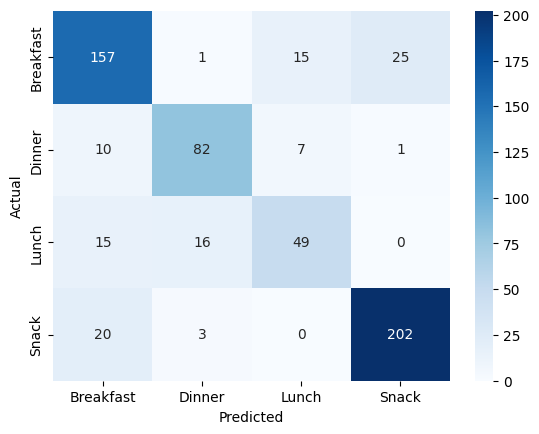

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **3. ROC Curve**

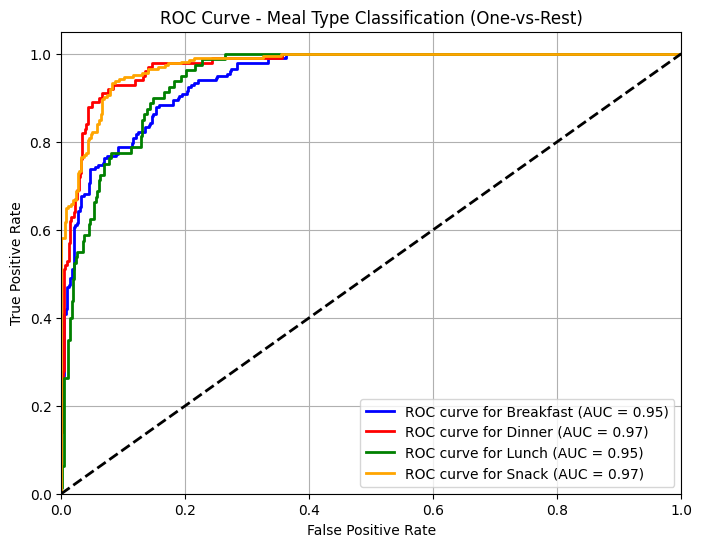

In [84]:
classes = sorted(y.unique())

y_test_bin = label_binarize(y_test, classes=classes)

y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
colors = cycle(['blue', 'red', 'green', 'orange'])

for i, color in zip(range(len(classes)), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f"ROC curve for {classes[i]} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Meal Type Classification (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [85]:
def predict_meal_test(
    calories, protein, carbs, fat,
    fiber, sugar, sodium, cholesterol
):

    total_macro_kcal = protein * 4 + carbs * 4 + fat * 9
    if total_macro_kcal == 0:
        total_macro_kcal = 1

    protein_pct = (protein * 4) / total_macro_kcal
    carbs_pct   = (carbs * 4) / total_macro_kcal
    fat_pct     = (fat * 9) / total_macro_kcal

    input_data = np.array([[
        calories,
        carbs,
        protein,
        fat,
        sugar,
        sodium,
        fiber,
        cholesterol,
        protein_pct,
        carbs_pct,
        fat_pct
    ]])

    # Scale numeric data
    input_scaled = scaler.transform(input_data)

    # Predict meal type
    pred = model.predict(input_scaled)[0]

    # Show prediction probabilities
    probs = model.predict_proba(input_scaled)[0]

    prob_table = dict(zip(model.classes_, np.round(probs, 4)))

    return pred, prob_table

# Test

prediction, probabilities = predict_meal_test(
    calories=500,
    protein=33.9,
    carbs=75.8,
    fat=47,
    fiber=7.8,
    sugar=19.4,
    sodium=358,
    cholesterol=148
)

print("Predicted Meal Type:", prediction)
print("Prediction Confidence:", {k: f"{v*100:.2f}%" for k, v in probabilities.items()})


Predicted Meal Type: Dinner
Prediction Confidence: {'Breakfast': '0.01%', 'Dinner': '98.22%', 'Lunch': '1.74%', 'Snack': '0.02%'}


C:\Users\Earl Yuan Balabag\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Visualizations**

### **1. Correlation Heatmap**

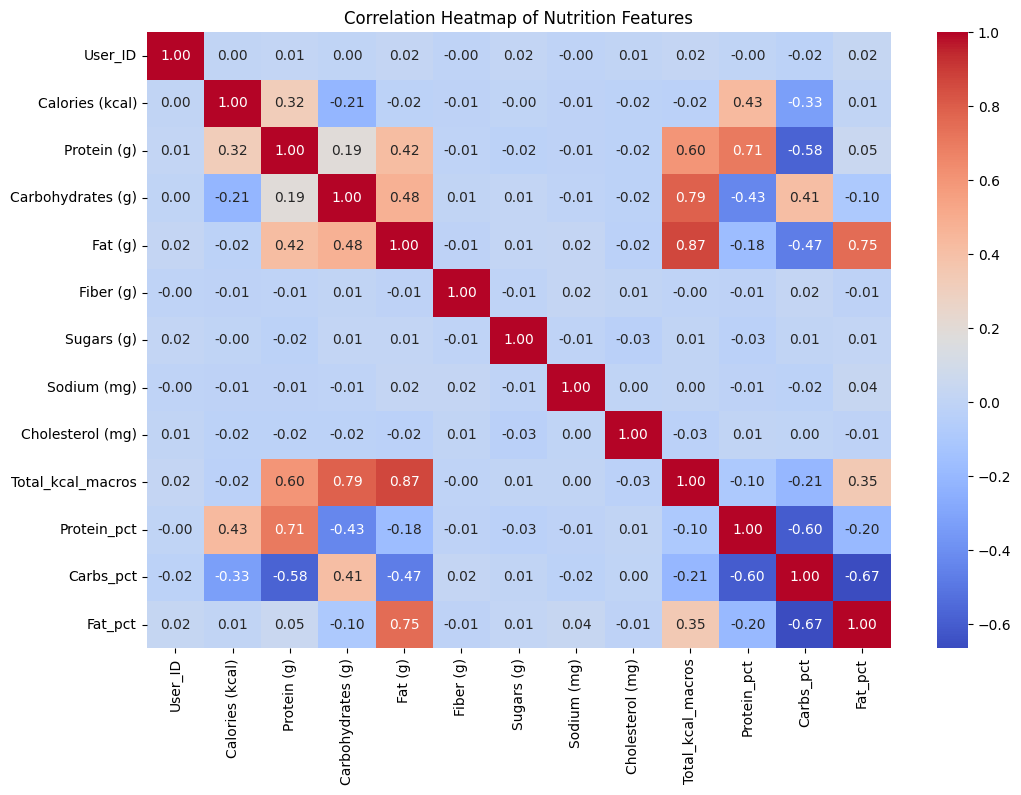

In [87]:
numeric_df = nutri_model.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of Nutrition Features")
plt.show()

### **2. Box Plot**

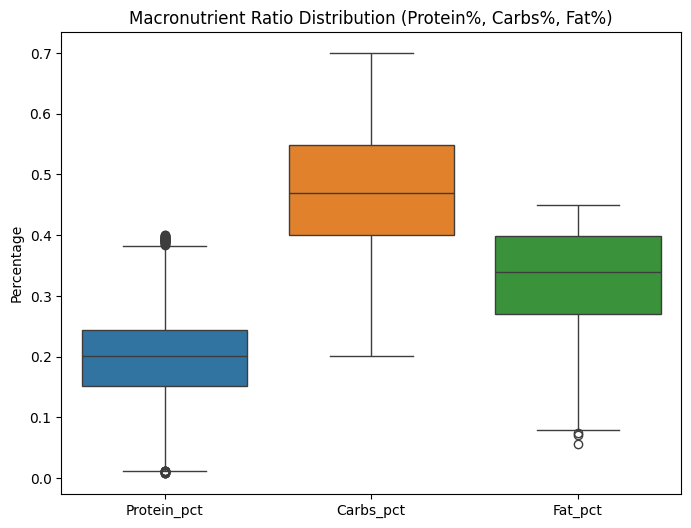

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_filtered[["Protein_pct", "Carbs_pct", "Fat_pct"]])
plt.title("Macronutrient Ratio Distribution (Protein%, Carbs%, Fat%)")
plt.ylabel("Percentage")
plt.show()

### **3. Pairplot**

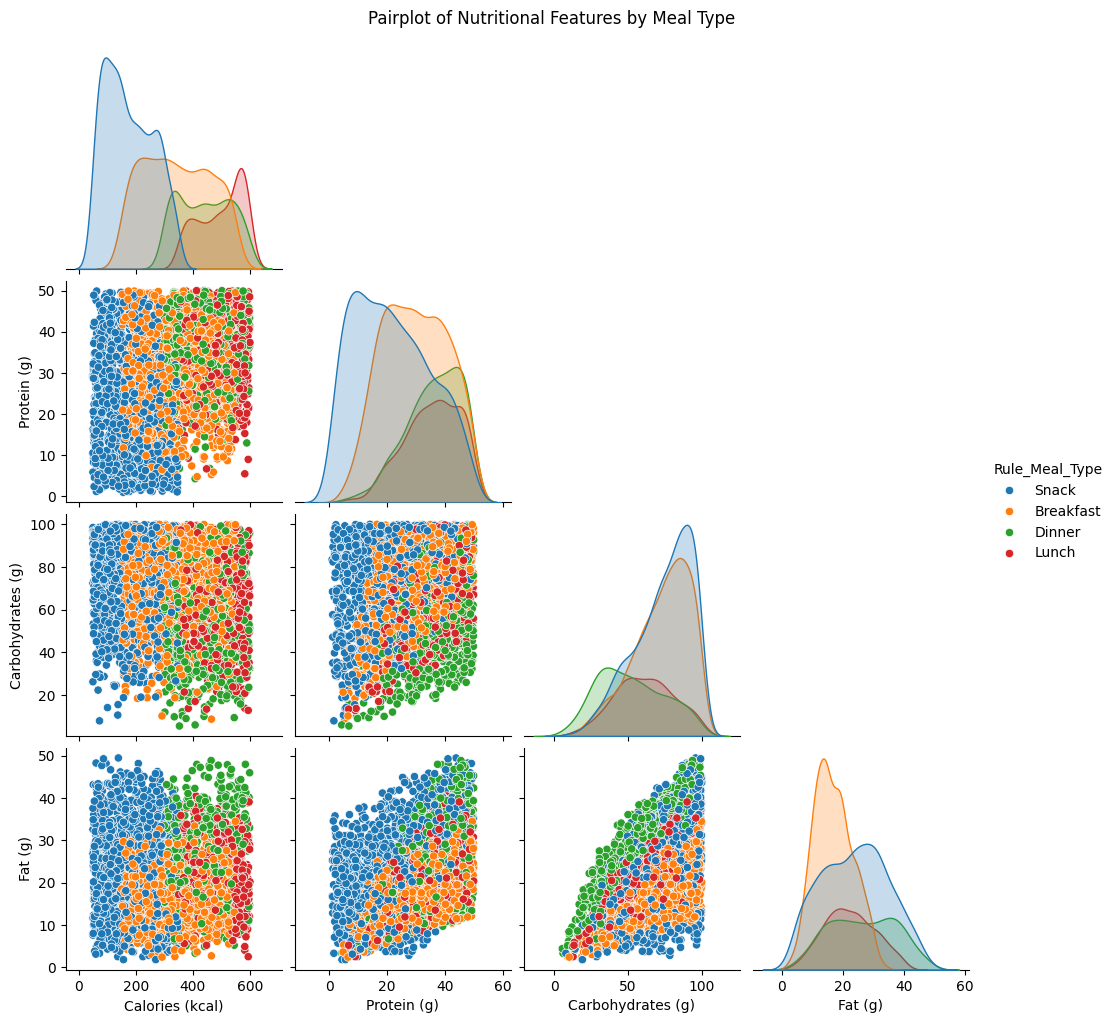

In [89]:
sns.pairplot(
    df_filtered,
    vars=["Calories (kcal)", "Protein (g)", "Carbohydrates (g)", "Fat (g)"],
    hue="Rule_Meal_Type",
    diag_kind="kde",
    corner=True
)

plt.suptitle("Pairplot of Nutritional Features by Meal Type", y=1.02)
plt.show()

## **E. Insights**

### **1. Model Performance**

Based on the overall analysis, the model performed reasonably well in predicting meal types, showing a solid accuracy of 81.26%, especially considering that the nutritional features overlap heavily between categories.

### **2. Feature Behavior**

**Pairplot**
* Calories vs. Macros: Higher-calorie meals clearly have higher carbs or fats.

* Fats vs. Carbs: Snacks are mostly low in both; dinners often have higher fat values.

Overlapping clusters show why the model does not reach perfect accuracy: some breakfasts and lunches share similar macro levels.

**Box Plot**
* Carbs% dominates meals (median ≈ 45–50%).
* Fat% varies the most, spanning low to high depending on meal type.
* Protein% is the smallest component, with a tight range.

**Correlation Heatmap**

Total_kcal_macros correlates strongly with:
* Carbs (0.79)
* Fat (0.87)
* Protein (0.60)

Sodium, sugar, cholesterol, and have almost no correlation with meal type features, meaning they contribute very little to classification.

### **3. Interpretation of Results**

Putting the visualizations together, we can understand why the model behaves the way it does. Since breakfast, lunch, and snacks often overlap in their nutrient values, the model sometimes mixes them up. Dinner stands out more clearly thanks to higher fats and calories, so the model identifies it more easily. The consistent trends in the macros help the model find structure, but the overlapping ranges limit how perfectly it can separate the classes. Overall, the results reflect the natural variability of real meals.

### **4. Improvement Suggestions**

To improve the model, a good step would be adding more meaningful features, like meal time, food category, or portion size, to help the model distinguish meals better. Using standardized or normalized versions of each nutrient may also help reduce noise from extreme values. Finally, testing more advanced models (Random Forest, XGBoost, or a simple neural network) could capture more subtle nonlinear relationships that the current model might miss.